In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import qgrid
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./merged_monthlyInfo.csv', index_col=0)
df_beta = pd.read_csv('./beta.csv', index_col=0)

In [3]:
df_beta = df_beta.dropna()

In [4]:
df_beta.head()

,600000,600004,600007,600008,600009,600011,600012,600015,600016,600017,...,601601,601628,601666,601699,601808,601857,601939,601988,601991,601998
2013-01,1.107955,0.765357,0.814966,0.967411,0.861140,0.695644,0.717668,0.837064,0.899479,0.835758,...,1.169431,0.950304,1.259531,1.594732,0.922375,0.637780,0.770370,0.607325,0.742620,0.848265
2013-02,1.120298,0.765737,0.795829,0.948405,0.864654,0.655563,0.707989,0.873930,0.910414,0.861732,...,1.130272,0.892784,1.299521,1.602488,0.921121,0.616097,0.751736,0.588556,0.722824,0.857944
2013-03,1.123275,0.766405,0.795683,0.946535,0.865976,0.655074,0.708128,0.877575,0.907275,0.862143,...,1.132107,0.893426,1.302042,1.606058,0.919197,0.619001,0.752119,0.588117,0.722779,0.858126
2013-04,1.140774,0.739266,0.784726,0.883210,0.831195,0.599534,0.695682,0.872028,0.887897,0.858937,...,1.117016,0.859152,1.377841,1.669429,0.859517,0.577462,0.749900,0.592160,0.699333,0.840491
2013-05,1.129066,0.727859,0.792882,0.904688,0.842592,0.598478,0.695042,0.872416,0.886161,0.856913,...,1.109720,0.836099,1.380144,1.657459,0.848226,0.575106,0.731979,0.590250,0.694680,0.845269


In [5]:
Months = list(df_beta.index)

## Compute BAB Factor and Beta Associated

### Sort Portfolio

Sort stocks according to their beta calculated in problem set 1, and then divided them into 10 bins as our portfolio. 

In [6]:
df_portfolio_beta = pd.DataFrame(columns=np.arange(1,11,1))

In [7]:
df_portfolio_r = pd.DataFrame(columns=np.arange(1,11,1))

In [8]:
for month in tqdm(Months):
    row = df_beta.loc[month]
    row = row.sort_values(ascending=False)
    betas = row.values
    stocks = row.index
    group_size = int(row.shape[0]/10)+1

    df_portfolio_beta.loc[month] = np.nan
    df_portfolio_r.loc[month] = np.nan
    
    for i in range(10):
        portfolio_beta = betas[i*group_size:(i+1)*group_size]
        portfolio_stks = stocks[i*group_size:(i+1)*group_size]
        
        df_portfolio_beta.loc[month][i+1] = portfolio_beta.mean()
        df_row = df[df['Month']==month]
        all_r = df_row['ri']-df_row['rf']
        df_portfolio_r.loc[month][i+1] = all_r[np.isin(all_r.index, list(portfolio_stks))].mean()

100%|██████████| 72/72 [00:03<00:00, 19.97it/s]


According the sorted stocks, the average beta & monthly return are saved in the two dataframes shown below

In [9]:
df_portfolio_beta = df_portfolio_beta.astype(float)
df_portfolio_r = df_portfolio_r.astype(float)

In [10]:
df_portfolio_beta.head()

,1,2,3,4,5,6,7,8,9,10
2013-01,1.394764,1.232731,1.140900,1.062479,0.993658,0.929144,0.874580,0.802690,0.682705,0.486758
2013-02,1.405691,1.253824,1.159335,1.085981,1.009603,0.933279,0.882443,0.811834,0.687612,0.488825
2013-03,1.406135,1.253580,1.157270,1.083826,1.007484,0.931493,0.881048,0.809595,0.686114,0.488288
2013-04,1.414769,1.259671,1.164345,1.080374,1.004277,0.925548,0.862250,0.795067,0.658351,0.455822
2013-05,1.419578,1.266420,1.175185,1.085334,1.014250,0.933711,0.868979,0.800272,0.662252,0.458132


In [11]:
df_portfolio_r.head()

,1,2,3,4,5,6,7,8,9,10
2013-01,0.050247,0.056412,0.039443,0.078849,0.107680,0.067680,0.054867,0.048454,0.052444,0.097103
2013-02,0.005955,0.004776,0.019404,0.007250,0.022769,0.041381,0.007775,0.035289,0.016447,0.031798
2013-03,-0.111203,-0.090991,-0.071433,-0.035808,-0.035372,-0.023627,-0.022781,-0.055836,-0.027492,0.027681
2013-04,-0.045102,-0.039188,-0.021196,-0.019410,-0.032663,-0.032001,-0.045206,-0.040061,-0.038787,-0.048729
2013-05,0.083056,0.096461,0.128655,0.103986,0.136524,0.096658,0.142761,0.105037,0.084134,0.095852


The info about high / low beta portfolio is listed below, where 1 is the high beta portfolio and 10 is the low beta portfolio

In [12]:
df_portfolio_beta.astype(float)[[1,10]].rename({1:'High Beta Portfolio', 10: 'Low Beta Portfolio'}, axis=1)

,High Beta Portfolio,Low Beta Portfolio
2013-01,1.394764,0.486758
2013-02,1.405691,0.488825
2013-03,1.406135,0.488288
2013-04,1.414769,0.455822
2013-05,1.419578,0.458132
2013-06,1.425799,0.462499
2013-07,1.452817,0.434111
2013-08,1.452499,0.433415
2013-09,1.436341,0.401121
2013-10,1.429713,0.400287


### Compute BAB Factor

The BAB factor is calculated by the following equation: 

$$
r_{t+1}^{BAB} = \frac{1}{\beta_t^L} (r_{t+1}^L -r_{t+1}^f)-\frac{1}{\beta_t^H} (r_{t+1}^H -r_{t+1}^f)
$$

The beta we used is simply the average of betas in each portfolio

$$ \beta_t^H=\frac{1}{n}\sum_{n=1}^N\beta_{n},\ \forall stock\ n\in High\ Portfolio$$

$$ \beta_t^L=\frac{1}{n}\sum_{n=1}^N\beta_{n},\ \forall stock\ n\in Low\ Portfolio$$



In [13]:
df_BAB = pd.DataFrame(columns=['rBAB', 'rm-rf'])

In [14]:
df_rf = df.drop_duplicates(['Month'])
df_rf['rm-rf'] = df_rf['rm']-df_rf['rf']
df_rf = df_rf.set_index('Month')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
for i in tqdm(range(len(Months))):
    current_month = Months[i]

    r_row = df_portfolio_r.loc[current_month]
    r1 = r_row[10]
    r2 = r_row[1]
    beta_row = df_portfolio_beta.loc[current_month]
    b1 = beta_row[10]
    b2 = beta_row[1]
    r_BAB = r1/b1-r2/b2
    df_BAB.loc[current_month] = 0
    df_BAB.loc[current_month]['rBAB'] = r_BAB-df_rf.loc[current_month]['rf']
    df_BAB.loc[current_month]['rm-rf'] = df_rf.loc[current_month]['rm-rf']

100%|██████████| 72/72 [00:00<00:00, 523.41it/s]


The calculated BAB factor is shown below:

In [16]:
df_BAB = df_BAB.astype(float)

In [17]:
df_BAB.head()

,rBAB,rm-rf
2013-01,0.160998,0.062509
2013-02,0.058347,-0.007511
2013-03,0.133308,-0.069141
2013-04,-0.077491,-0.021614
2013-05,0.148250,0.062552


## Regress Beta (Benchmark to CAPM)

Regress beta of BAB factor

In [18]:
X = df_BAB['rm-rf'].values
y = df_BAB['rBAB'].values

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     46.56
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           2.62e-09
Time:                        21:05:59   Log-Likelihood:                 52.164
No. Observations:                  72   AIC:                            -100.3
Df Residuals:                      70   BIC:                            -95.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0223      0.014      1.587      0.117      -0.006       0.050
x1             1.3727      0.201      6.823      0.000       0.971       1.774
==============================================================================
Omnibus:                       38.058   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.344
Skew:                           1.651   Prob(JB):                     6.64e-25
Kurtosis:                       8.120   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results.t_test('const=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0223      0.014      1.587      0.117      -0.006       0.050

## Plot BAB Return

In [21]:
cum_BAB = np.cumprod((df_BAB['rBAB']+1).values)

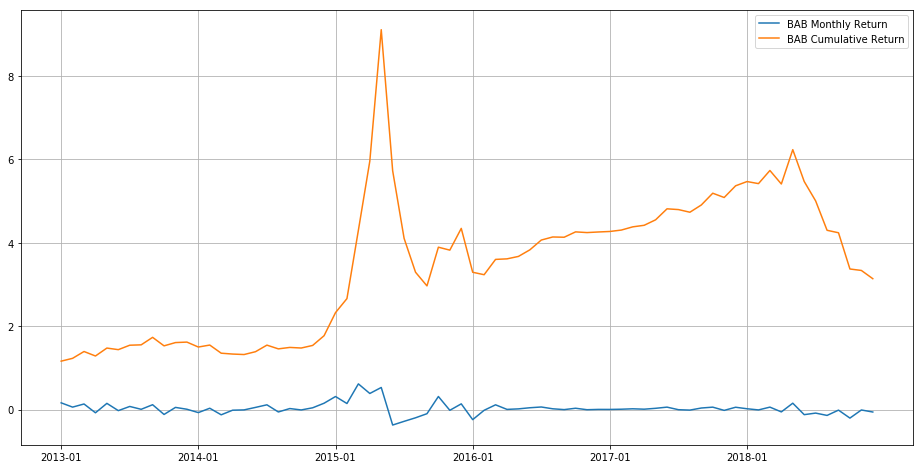

In [22]:
fig = plt.figure(figsize=(16,8))

fig = plt.plot(Months, df_BAB['rBAB'].values, label='BAB Monthly Return')
fig = plt.plot(Months, cum_BAB, label='BAB Cumulative Return')
fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.xticks(np.arange(0,72,12))

## Construct a BAB Strategy

### Load three factors and calculate their excess return

In [23]:
df_factors = pd.read_csv('./3factors.csv', index_col=0)
df_factors = df_factors.loc['2013-01':]

In [24]:
df_factors.head()

,rp,smb,hml
TradingMonth,,,
2013-01,0.206833,0.020453,-0.024704
2013-02,-0.021167,0.054321,0.015496
2013-03,-0.057167,-0.001437,0.015057
2013-04,0.013833,0.004016,0.036779
2013-05,0.063833,0.016467,-0.043960


In [25]:
df_BAB.head()

,rBAB,rm-rf
2013-01,0.160998,0.062509
2013-02,0.058347,-0.007511
2013-03,0.133308,-0.069141
2013-04,-0.077491,-0.021614
2013-05,0.148250,0.062552


In [27]:
df_factors = pd.concat([df_BAB, df_factors[['smb', 'hml']]], axis=1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [28]:
df_factors.head()

,rBAB,rm-rf,smb,hml
2013-01,0.160998,0.062509,0.020453,-0.024704
2013-02,0.058347,-0.007511,0.054321,0.015496
2013-03,0.133308,-0.069141,-0.001437,0.015057
2013-04,-0.077491,-0.021614,0.004016,0.036779
2013-05,0.148250,0.062552,0.016467,-0.043960


In [29]:
df_factors = df_factors.loc[:'2018-12']

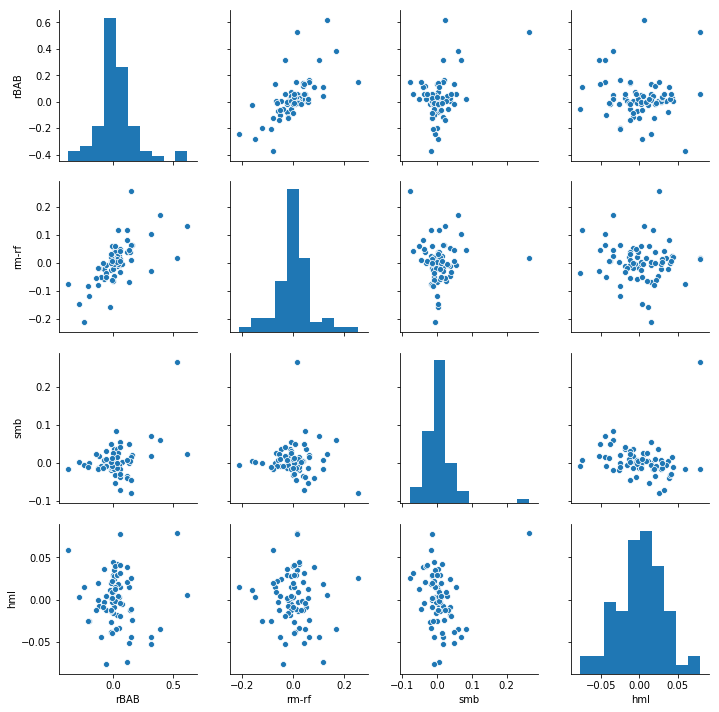

In [30]:
sns.pairplot(df_factors, )

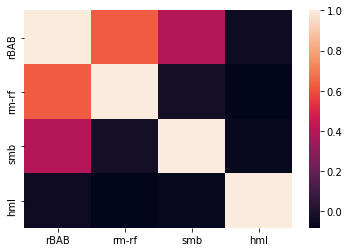

In [31]:
sns.heatmap(df_factors.corr())

In [32]:
df_factors.corr()

,rBAB,rm-rf,smb,hml
rBAB,1.000000,0.632014,0.401330,-0.040789
rm-rf,0.632014,1.000000,-0.024171,-0.082060
smb,0.401330,-0.024171,1.000000,-0.059941
hml,-0.040789,-0.082060,-0.059941,1.000000


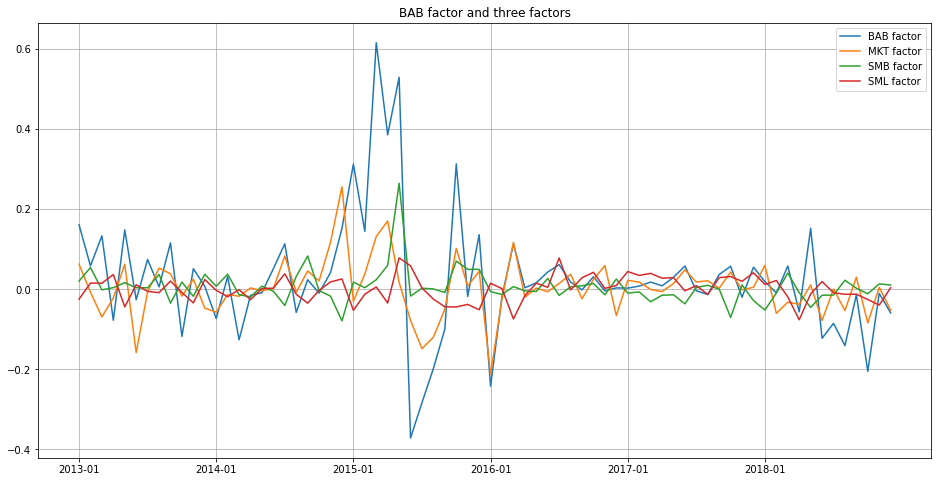

In [33]:
fig = plt.figure(figsize=(16,8))

fig = plt.plot(Months, df_factors['rBAB'].values, label='BAB factor')
fig = plt.plot(Months, df_factors['rm-rf'].values, label='MKT factor')
fig = plt.plot(Months, df_factors['smb'].values, label='SMB factor')
fig = plt.plot(Months, df_factors['hml'].values, label='SML factor')
fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('BAB factor and three factors')
fig = plt.xticks(np.arange(0,72,12))

### Regress BAB factor on three factor model

As the pairplot and the heatmap have shown, rBAB factor has a high correlation with excess market return (rp-rf / rm-rf), but less correlation with the other two (smb-rf, hml-rf)

Now we do the following regression:

$$ rBAB_t = \alpha+\beta_{MKT}MKT_t+\beta_{SMB}SMB_t+\beta_{SML}SML_t+\epsilon_i$$

In [34]:
X = df_factors[['rm-rf', 'smb', 'hml']]
y = df_factors['rBAB']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rBAB   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     30.60
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.23e-12
Time:                        21:10:06   Log-Likelihood:                 64.568
No. Observations:                  72   AIC:                            -121.1
Df Residuals:                      68   BIC:                            -112.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0131      0.012      1.078      0.285      -0.011       0.037
rm-rf          1.4014      0.172      8.125      0.000       1.057       1.746
smb            1.5046      0.285      5.287      0.000       0.937       2.072
hml            0.1817      0.388      0.469      0.641      -0.592       0.955
==============================================================================
Omnibus:                       24.419   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.638
Skew:                           1.122   Prob(JB):                     6.12e-12
Kurtosis:                       6.489   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression coefficient of rm-rf, smb-rf indicate that rBAB factor has a positive correlation with these two factors, as the heapmap and pairplot showed

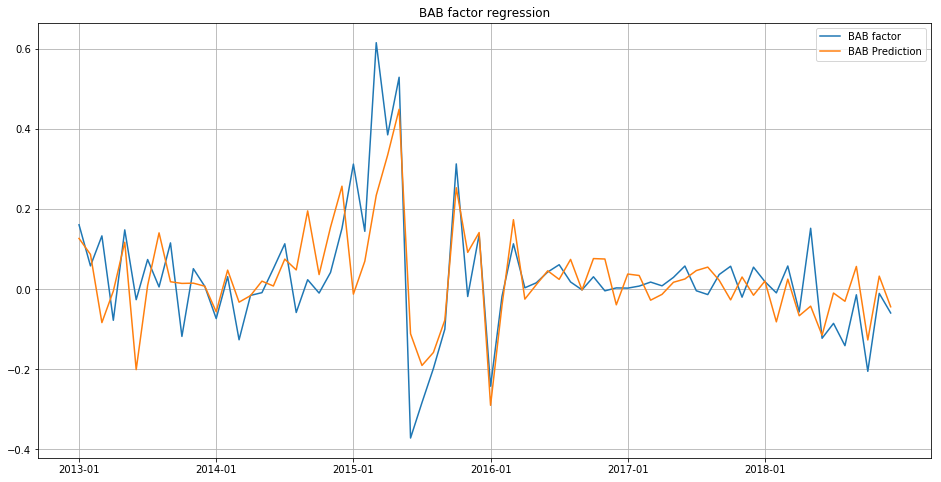

In [36]:
fig = plt.figure(figsize=(16,8))

fig = plt.plot(Months, df_factors['rBAB'].values, label='BAB factor')
fig = plt.plot(Months, results.predict(X), label='BAB Prediction')
fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('BAB factor regression')
fig = plt.xticks(np.arange(0,72,12))

### Summary

- BAB factor amplify market factor and SMB factor, since the regression coefficient is 1.4 / 1.5

- During 2015-2016, the was a big fall on market factor, so is BAB factor. In contrast, SMB factor is steady

- The reason that BAB factor is related to market factor:
    - When market booms (reflected in market factor), people tend to leverage to obtain high return, and if they are not able to do so, they long high-beta stocks instead. Therefore, the value of high-beta stocks are overvalued, and to long high-beta stocks and short low-beta stocks brings excess return (BAB strategy in Q2).
    - However, when market falls, people's risk aversion extent increases, so they tend to hold stocks with smaller risk, i.e. low-beta stock. Hence, at this time, low-beta stocks are overvalued instead, and this explains why BAB strategy performs badly during this period
    

In [37]:
params = results.params

In [38]:
MKT = df_factors['rm-rf']
SMB = df_factors['smb']
HML = df_factors['hml']
BAB = df_factors['rBAB']

In [39]:
x0 = np.ones(72)*params['const']
x1 = MKT*params['rm-rf']
x2 = SMB*params['smb']
x3 = HML*params['hml']

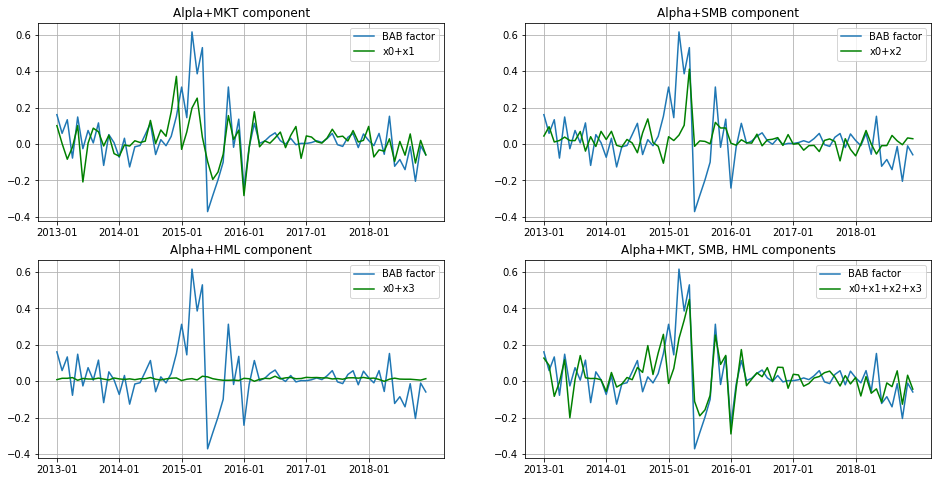

In [40]:
fig = plt.figure(figsize=(16,8))

fig = plt.subplot(2,2,1)
reg_func = 'x0+x1'
fig = plt.plot(Months, df_factors['rBAB'].values, label='BAB factor')
fig = plt.plot(Months, eval(reg_func), label=reg_func, color='g')
# plt.plot(Months, x2, label='SMB')
# plt.plot(Months, x3, label='HML')
fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('Alpla+MKT component')
fig = plt.xticks(np.arange(0,72,12))

fig = plt.subplot(2,2,2)
fig = reg_func = 'x0+x2'
fig = plt.plot(Months, df_factors['rBAB'].values, label='BAB factor')
fig = plt.plot(Months, eval(reg_func), label=reg_func, color='g')
# plt.plot(Months, x2, label='SMB')
# plt.plot(Months, x3, label='HML')
fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('Alpha+SMB component')
fig = plt.xticks(np.arange(0,72,12))

fig = plt.subplot(2,2,3)
reg_func = 'x0+x3'
fig = plt.plot(Months, df_factors['rBAB'].values, label='BAB factor')
fig = plt.plot(Months, eval(reg_func), label=reg_func, color='g')
# plt.plot(Months, x2, label='SMB')
# plt.plot(Months, x3, label='HML')
fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('Alpha+HML component')
fig = plt.xticks(np.arange(0,72,12))

fig = plt.subplot(2,2,4)
reg_func = 'x0+x1+x2+x3'
fig = plt.plot(Months, df_factors['rBAB'].values, label='BAB factor')
fig = plt.plot(Months, eval(reg_func), label=reg_func, color='g')
# plt.plot(Months, x2, label='SMB')
# plt.plot(Months, x3, label='HML')
fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('Alpha+MKT, SMB, HML components')
fig = plt.xticks(np.arange(0,72,12))

### Construct new portfolio

The newly constructed portfolio is a linear combination of the original BAB portfolio and a "Compensate" (Cpst) portfolio

$$ rBAB_t^{new}=(1-\lambda)r_{p1}+\lambda\cdot r_{p2}$$

where
$$ r_{BAB}=\frac{1}{\beta_t^L} (r_{t+1}^L -r_{t+1}^f)-\frac{1}{\beta_t^H} (r_{t+1}^H -r_{t+1}^f) $$

$$ r_{Cpst}=\frac{MKT_t}{||MKT_t+SMB_t||_1}(MKT_{t+1}-r^f_{t+1})+\frac{SMB_t}{||MKT_t+SMB_t||_1}(SMB_{t+1}-r^f_{t+1})$$

In [41]:
lam = 0.5

In [42]:
new_BAB = (1-lam)*BAB[1:].values + lam*((MKT/(np.abs(MKT)+np.abs(SMB)))*MKT+(SMB/(np.abs(MKT)+np.abs(SMB)))*SMB)[:-1].values

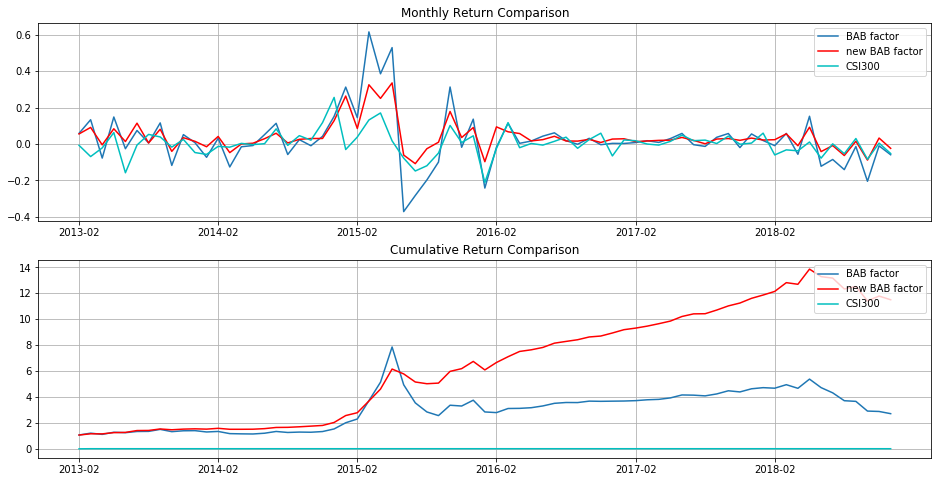

In [43]:
fig = plt.figure(figsize=(16,8))

fig = plt.subplot(2,1,1)
fig = plt.plot(Months[1:], BAB[1:].values, label='BAB factor')
fig = plt.plot(Months[1:], new_BAB, label='new BAB factor', color='r')
fig = plt.plot(Months[1:], df_factors['rm-rf'][1:].values, label='CSI300', color='c')

fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('Monthly Return Comparison')
fig = plt.xticks(np.arange(0,72,12))

fig = plt.subplot(2,1,2)
fig = plt.plot(Months[1:], np.cumprod(BAB[1:].values+1), label='BAB factor')
fig = plt.plot(Months[1:], np.cumprod(new_BAB+1), label='new BAB factor', color='r')
fig = plt.plot(Months[1:], np.cumprod(df_factors['rm-rf'][1:].values), label='CSI300', color='c')

fig = plt.grid(True)
fig = plt.legend(loc=1)
fig = plt.title('Cumulative Return Comparison')
fig = plt.xticks(np.arange(0,72,12))

In [44]:
BAB[1:].values.mean()

0.0246907316254893

In [45]:
BAB[1:].values.std()

0.15151191619499613

In [46]:
new_BAB.mean()

0.03780718898295542

In [47]:
new_BAB.std()

0.07945816042342951

In [48]:
X = df_BAB['rm-rf'].values[1:]
y = new_BAB

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     29.59
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           7.62e-07
Time:                        21:10:16   Log-Likelihood:                 91.734
No. Observations:                  71   AIC:                            -179.5
Df Residuals:                      69   BIC:                            -174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0364      0.008      4.542      0.000       0.020       0.052
x1             0.6237      0.115      5.440      0.000       0.395       0.852
==============================================================================
Omnibus:                       51.591   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.263
Skew:                           2.306   Prob(JB):                     9.72e-41
Kurtosis:                       9.405   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
results.t_test('const=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0364      0.008      4.542      0.000       0.020       0.052

Therefore, our newly constructed BAB portfolio not only reduces risk (standard deviation from 0.15151191619499613 to 0.07950698047221628), but also yields a abnormal positive alpha, since the t test result claims that p value is very small, and alpha significanly $\ne$ 0.